# Content and Objective

+ Show effects of upsampling by artificially increasing sampling frequency
+ Show interpolation by using lowpass filtering

# Importing and Plotting Options

In [1]:
import numpy as np

from scipy import signal

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# plotting options 
font = {'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)

matplotlib.rc('figure', figsize=(18, 6) )

# Parameters

In [3]:
# define parameters
t_min = 0.0
t_max = 10.0    

# sampling time and Nyquist frequency 
t_s = .25
f_Nyquist = 1 / (2.0 * t_s )

# Sampled signal and spectra

In [4]:
# get time vector, define signal and normalize
t_samp = np.arange( t_min, t_max, t_s)

x_samp = ( signal.gausspulse( t_samp-3, 1, retenv=1))[1] 
x_samp = x_samp * np.sqrt( 1 / sum(x_samp**2) )

# determine according Nyquist band and fft
f_samp = np.arange( -f_Nyquist, f_Nyquist, 1/(t_max-t_min) )    

X_samp = np.fft.fftshift( np.fft.fft( x_samp ) )  

 # Perform upsampling

In [11]:
# upsampling
M = 4
t_s_up = t_s / M
t_up = np.arange(t_min, t_max, t_s_up)

# upsample signal by factor M using lambda function
x_up = np.zeros( M * len(x_samp) )
x_up[ :: M ] = x_samp

# determine according Nyquist band and fft
f_Nyquist_up = 1 / ( t_s_up * 2.0 )
f_up = np.arange( -f_Nyquist_up, f_Nyquist_up, 1/(t_max-t_min) )    
X_up = np.fft.fftshift( np.fft.fft(x_up) )

In [12]:
# apply ideal filtering to the upsampled sequence
X_up_f_i = np.copy( X_up )

ind_Nyquist = np.argwhere( abs(f_up) > f_Nyquist ) 
X_up_f_i[ ind_Nyquist ] = 0

x_up_f_i = np.fft.ifft( np.fft.fftshift( X_up_f_i ) )
    
   
# apply "real-world" filtering
cutoff_freq = f_Nyquist

ripple_db = 60                      # ripples and transition width of the filter
width = f_Nyquist / 50.0

N, beta = signal.kaiserord(ripple_db, width)    # find filter order and beta parameter

# find filter and filter input
taps = signal.firwin( N, cutoff=cutoff_freq,  window=('kaiser', beta), nyq = f_Nyquist_up)
x_up_f_k = signal.lfilter(taps, 1.0, x_up)
X_up_f_k = np.fft.fftshift( np.fft.fft(x_up_f_k) )


# impulse and frequency response of the filter
w, H = signal.freqz( taps )
h = taps

# Plotting results

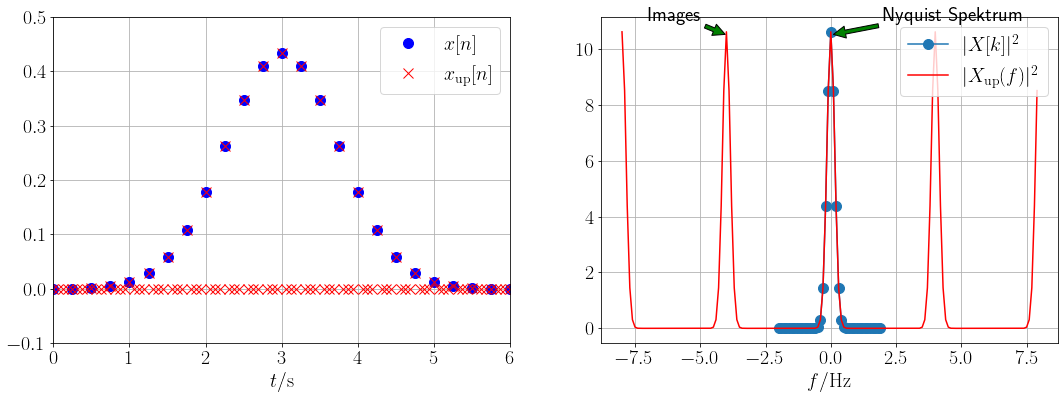

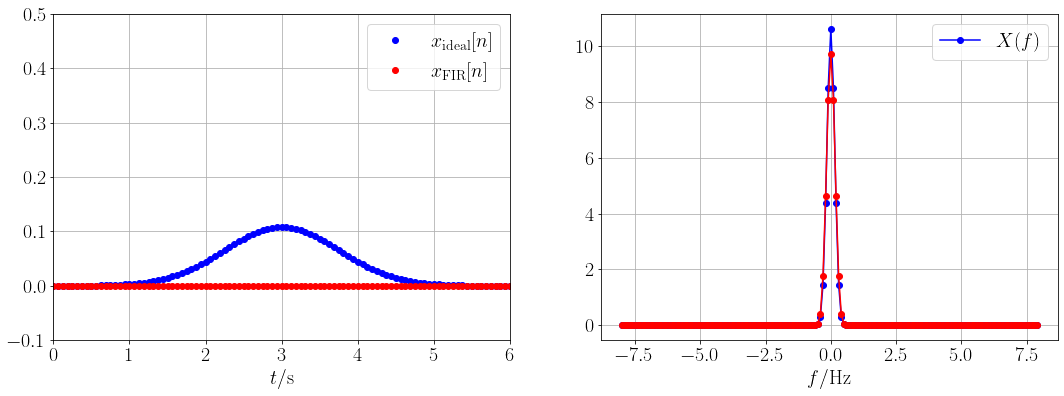

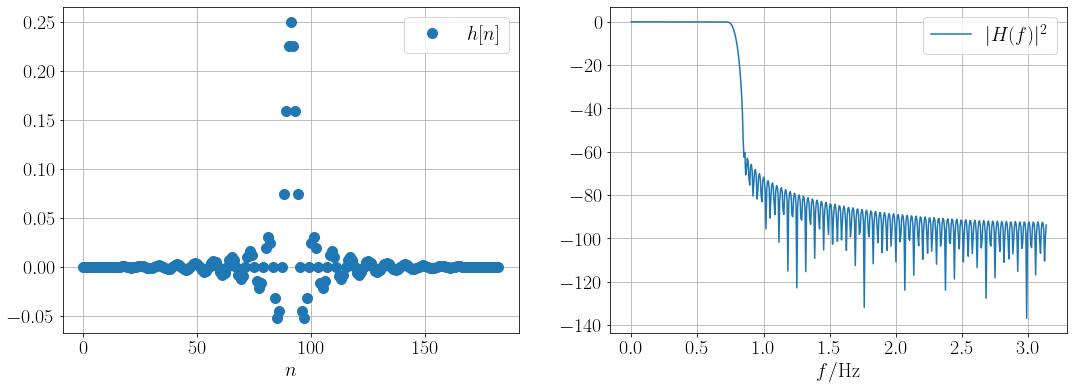

In [13]:
plt.figure(1)

plt.subplot(121)
plt.plot(t_samp, x_samp, 'bo', markersize=10, label='$x[n]$')
plt.plot(t_up, x_up, 'rx', markersize=10, label='$x_\\mathrm{up}[n]$')
plt.grid(True)
plt.axis(xmin=0, xmax=6, ymin=-.1, ymax=.5)    
plt.xlabel('$t/\mathrm{s}$')
plt.legend(loc='upper right')

plt.subplot(122)        
plt.plot(f_samp, abs(X_samp)**2, '-o', markersize=10, label='$|X[k]|^2$')
plt.plot(f_up, abs(X_up)**2, 'r', label='$|X_\\mathrm{up}(f)|^2$')
plt.grid(True)
plt.xlabel('$f/\mathrm{Hz}$')
#plt.ylabel('$|X[k]|^2$')
plt.annotate('Nyquist Spektrum',
        xy=(0,10.5),
        xytext=(2,11),
        arrowprops={'facecolor':'green','shrink':0.05},
        )    
plt.annotate('Images',
        xy=(-4,10.5),
        xytext=(-7,11),
        arrowprops={'facecolor':'green','shrink':0.05},
        )  
plt.legend(loc='upper right')


plt.figure(2)

plt.subplot(121)
plt.plot(t_up, x_up_f_i,'bo',label='$x_\\mathrm{ideal}[n]$')
plt.plot(t_up, x_up_f_k,'ro',label='$x_\\mathrm{FIR}[n]$')
plt.grid(True)
plt.axis(xmin=0, xmax=6, ymin=-.1, ymax=.5)    
plt.xlabel('$t/\mathrm{s}$')
plt.legend(loc='upper right')           

plt.subplot(122)        
plt.plot(f_up, abs(X_up_f_i)**2, '-bo', label='$X(f)$')
plt.plot(f_up, abs(X_up_f_k)**2, '-ro')
plt.grid(True)
plt.legend(loc=0)   
plt.xlabel('$f/\mathrm{Hz}$')
plt.legend(loc='upper right')      


plt.figure(3)

plt.subplot(121)
plt.plot(np.arange(0, len(h)), h, 'o', markersize=10, label='$h[n]$')
plt.grid(True)
plt.xlabel('$n$')
#plt.ylabel('$h[n]$')
plt.legend(loc='upper right')      

plt.subplot(122)        
plt.plot(w, 10*np.log10(abs(H)**2), label='$|H(f)|^2$')
plt.grid(True)
plt.xlabel('$f/\mathrm{Hz}$')
#plt.ylabel('$|H(f)|^2 (dB)$')
plt.legend(loc='upper right')  